<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 3<br>
<font color=696880 size=4>
    Ashkan Majidi - Shayan Salehi - Amirhossein Alamdar

____

# Personal Data

In [2]:
student_number = '402212269'
first_name = 'Amir Mohammad'
last_name = 'Ezzati'

# Introduction

In this assignment, you will implement SVM (Support Vector Machines) for classification.


# Data Preprocessing

Import your needed libraries in following cell.

In [ ]:
pip install cvxopt

In [7]:
# TODO: Write your code here
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler


Load data from ```satimage``` dataset and split data to features and labels. The ```label``` column is our target variable. 

In [2]:
# TODO: Write your code here
dataset = pd.read_csv('Data/satimage.csv')
features = dataset[dataset.columns[:-1]].to_numpy()
labels = dataset['label'].to_numpy()

In [6]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,label
0,7.5,6.272730,4.047619,3.975208,3.032258,4.545455,8.421050,1.8125,-2.2500,0.077672,...,-0.600000,-0.138462,-0.188119,-0.431579,-0.546875,-0.15625,-0.126214,-0.431579,-0.484375,6.0
1,7.5,4.090909,-0.714290,1.776858,2.903226,3.090909,5.052630,-1.7500,-2.2500,0.077672,...,-0.600000,-0.015385,-0.049505,-0.431579,-0.609375,-0.15625,-0.126214,-0.494737,-0.609375,6.0
2,12.0,9.909090,8.333330,5.479339,3.354839,7.272730,10.526316,2.7500,3.4375,6.368924,...,-0.233333,0.200000,0.207921,-0.010526,-0.312500,-0.15625,0.009709,-0.326316,-0.437500,6.0
3,7.5,4.818182,1.190480,2.702482,2.774194,2.363640,5.894740,-0.2500,-3.8750,-2.368924,...,-0.383333,-0.138462,-0.049505,-0.347368,-0.484375,0.09375,0.087379,-0.031579,-0.218750,6.0
4,7.5,4.818182,2.142860,2.702482,3.032258,3.090909,6.736840,-1.0000,-0.6250,-1.320388,...,-0.183333,0.230769,0.267327,-0.031579,-0.281250,-0.03125,-0.126214,-0.431579,-0.546875,6.0


Now split data to train, validation and test parts. 60% of data should be used for train, 15% for validation and 25% for test. After that scale the data to Standard Normal Distribution using ```StandardScaler``` class from ```scikit-learn``` library.

In [3]:
features.shape, labels.shape

((6435, 36), (6435,))

In [24]:
# TODO: Write your code here
x_train, x_val, y_train, y_val = train_test_split(features, labels, test_size=0.4, random_state=23)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.625, random_state=23)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [25]:
x_train_scaled.shape, x_val_scaled.shape, x_test_scaled.shape

((3861, 36), (965, 36), (1609, 36))

We want to train Binary SVM model for classification between labels 4 and 6. Choose corresponding datas and convert their lables to 1 and -1 respectively for 4 and 6.

In [26]:
# TODO: Write your code here

# get only lables 4 and 6 in all datasets
train_indices = np.where((y_train == 4) | (y_train == 6))
val_indices = np.where((y_val == 4) | (y_val == 6))
test_indices = np.where((y_test == 4) | (y_test == 6))

x_train_filtered = x_train_scaled[train_indices]
y_train_filtered = y_train[train_indices]

x_val_filtered = x_val_scaled[val_indices]
y_val_filtered = y_val[val_indices]

x_test_filtered = x_test_scaled[test_indices]
y_test_filtered = y_test[test_indices]

# convert labels to 1 and -1
y_train_filtered[y_train_filtered == 4] = 1
y_val_filtered[y_val_filtered == 4] = 1
y_test_filtered[y_test_filtered == 4] = 1

y_val_filtered[y_val_filtered == 6] = -1
y_train_filtered[y_train_filtered == 6] = -1
y_test_filtered[y_test_filtered == 6] = -1


In [27]:
x_train_filtered.shape, x_val_filtered.shape, x_test_filtered.shape

((1234, 36), (346, 36), (554, 36))

# Model (50 points)

Here is soft margin svm convex optimization formulation. 
$$
\begin{aligned}
\text { Minimize } & \frac{1}{2}\|\mathbf{w}\|^2+C \sum_{i=1}^N \xi_i \\
\text { Subject to } & y_i\left(\mathbf{w}^T \mathbf{x}_i+b\right) \geq 1-\xi_i, \quad i=1,2, \ldots, N \\
& \xi_i \geq 0, \quad i=1,2, \ldots, N
\end{aligned}
$$
write dual of the soft margin svm optimization problem below:

`TODO: Write Here`

\begin{gathered}
0 \leq \alpha_i \leq C, \quad i=1,2, \ldots, N \\
\qquad \sum_{i=1}^N \alpha_i y_i=0 \\
\text { Maximize } \sum_{i=1}^N \alpha_i-\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j\left\langle x_i, x_j\right\rangle
\end{gathered}

Now you should write this optimization problem in standard Quadratic Program (QP) form and use a QP solver to find optimal answer. Here is General form of a QP:
$$
\begin{aligned}
\text { Minimize } & \frac{1}{2} x^TPx + q^Tx + r \\
\text { Subject to } & Gx \leq h \\
& Ax = b
\end{aligned}
$$

Complete functions below and use ```cvxopt``` library which is a common library for solving QPs. Note that you can't use ```scikit-learn``` library.


In [63]:
from cvxopt import matrix, solvers

def soft_margin_svm(X, y, C):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs 
    """

    # TODO: Write your code here
    n_samples, n_features = X.shape

    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = np.dot(X[i], X[j])

    P = matrix(np.outer(y, y) * K)
    q = matrix(np.ones(n_samples) * -1)
    A = matrix(y, (1, n_samples))
    b = matrix(0.0)

    if C is None:
        G = matrix(np.diag(np.ones(n_samples) * -1))
        h = matrix(np.zeros(n_samples))
    else:
        tmp1 = np.diag(np.ones(n_samples) * -1)
        tmp2 = np.identity(n_samples)
        G = matrix(np.vstack((tmp1, tmp2)))
        tmp1 = np.zeros(n_samples)
        tmp2 = np.ones(n_samples) * C
        h = matrix(np.hstack((tmp1, tmp2)))

    # solve QP problem
    solution = solvers.qp(P, q, G, h, A, b)

    alphas = np.ravel(solution['x'])

    sv_indices = alphas > 1e-5
    support_vectors = X[sv_indices]
    support_vector_labels = y[sv_indices]
    support_vector_alphas= alphas[sv_indices]

    print(f"{len(support_vectors)} support vectors out of {n_samples} points")

    return support_vectors, support_vector_labels, support_vector_alphas

In [61]:
C = 1.0
support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(x_train_filtered, y_train_filtered, C)

     pcost       dcost       gap    pres   dres
 0: -5.9280e+02 -3.3350e+03  2e+04  3e+00  2e-13
 1: -4.0417e+02 -2.2662e+03  3e+03  4e-01  1e-13
 2: -3.7832e+02 -7.6370e+02  5e+02  3e-02  1e-13
 3: -4.2408e+02 -5.4735e+02  1e+02  8e-03  1e-13
 4: -4.4379e+02 -5.1122e+02  7e+01  4e-03  1e-13
 5: -4.5413e+02 -4.9142e+02  4e+01  2e-03  1e-13
 6: -4.5949e+02 -4.8128e+02  2e+01  7e-04  1e-13
 7: -4.6452e+02 -4.7297e+02  9e+00  2e-04  1e-13
 8: -4.6648e+02 -4.7005e+02  4e+00  8e-05  1e-13
 9: -4.6751e+02 -4.6852e+02  1e+00  1e-05  1e-13
10: -4.6783e+02 -4.6809e+02  3e-01  2e-07  1e-13
11: -4.6795e+02 -4.6796e+02  1e-02  4e-09  1e-13
12: -4.6795e+02 -4.6795e+02  4e-04  1e-10  1e-13
Optimal solution found.
495 support vectors out of 1234 points


In [51]:
def predict_labels(x_test, support_vectors, support_vector_labels, support_vector_alphas):
    """
    input:
        x_test: test data
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs 
    output:
        y_pred: predictoin labels
    """
    
    # TODO: Write your code here
    n_test_samples = x_test.shape[0]
    y_pred = np.zeros(n_test_samples)

    for i in range(n_test_samples):
        prediction = 0
        for alpha, sv_label, sv in zip(support_vector_alphas, support_vector_labels, support_vectors):
            prediction += alpha * sv_label * np.dot(sv, x_test[i])
        y_pred[i] = np.sign(prediction)

    return y_pred

In [52]:
y_pred = predict_labels(np.array(x_test_filtered), support_vectors, support_vector_labels, support_vector_alphas)

# Evaluation (20 points)

Compute accuracy, balanced accuracy and plot confusion matrix of your trained model using ```Seaborn.heatmap()``` function. Use case of balanced accuracy is when dealing with imbalanced data, i.e. when one of the target classes appears a lot more than the other and it is defined by average of recall of classes. Confusion matrix is a $k\times k$ (k is number of classes) matrix which cell ij is showing that number of data points labeld i which predicted j. For more detail of evaluation metrics you can see [here](https://neptune.ai/blog/balanced-accuracy).

You may use ```scikit-learn``` library to compute these metrics.

In [53]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix

def evaluate(y_test, y_pred):
    """
    input:
        y_test: true labels
        y_pred: predicted labels
    output:
        accuracy: accuracy of the model
        balanced_accuracy: balanced accuracy of the model
        confusion_matrix: confusion matrix of the model
    """
    # TODO: Write your code here

    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print("Accuracy: ", accuracy)
    print("Balanced Accuracy: ", balanced_accuracy)
    print("Confusion Matrix:\n", confusion_mat)
    return accuracy, balanced_accuracy, confusion_mat


_, _, confusion_mat = evaluate(y_test_filtered, y_pred)

Accuracy:  0.8176895306859205
Balanced Accuracy:  0.7574421513445904
Confusion Matrix:
 [[353  37]
 [ 64 100]]


<Axes: >

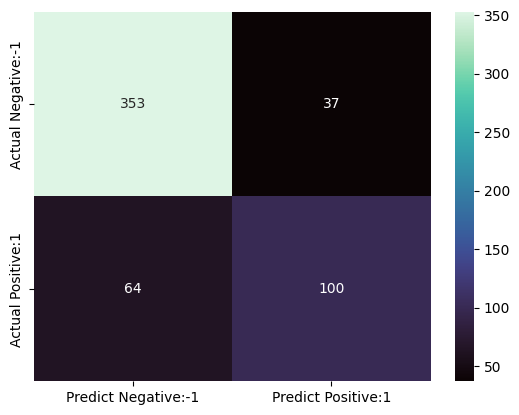

In [54]:
cm_matrix = pd.DataFrame(data=confusion_mat, columns=['Predict Negative:-1', 'Predict Positive:1'],
                                 index=['Actual Negative:-1', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# Fine-tunning (40 points)

like what you did before, implement Soft Margin SVM but now use rbf kernel. To determine rbf $\gamma$ parameter use validation datas and find best(best by balanced accuracy) $\gamma$ between 0.001 , 0.01, 1, 10, 100. Not that you can't use ```scikit-learn``` library here.

In [130]:
def rbf(x1, x2, gamma=1):
    """
    input:
        x1: first vector
        x2: second vector
        gamma: rbf kernel parameter with defalt value 1.
    output:
        ouput: computed rbf of two input vectors
    """
    # TODO: Write your code here
    dd = x1 - x2
    res = - gamma * np.dot(dd,dd)
    output = np.exp(res)
    return output

def soft_margin_svm(X, y, C, gamma=1):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
        gamma: rbf kernel parameter with defalt value 1.
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs 
    """

    # TODO: Write your code here
    n_samples, n_features = X.shape

    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = rbf(X[i], X[j], gamma)

    P = matrix(np.outer(y, y) * K)
    q = matrix(np.ones(n_samples) * -1)
    A = matrix(y, (1, n_samples))
    b = matrix(0.0)

    if C is None:
        G = matrix(np.diag(np.ones(n_samples) * -1))
        h = matrix(np.zeros(n_samples))
    else:
        tmp1 = np.diag(np.ones(n_samples) * -1)
        tmp2 = np.identity(n_samples)
        G = matrix(np.vstack((tmp1, tmp2)))
        tmp1 = np.zeros(n_samples)
        tmp2 = np.ones(n_samples) * C
        h = matrix(np.hstack((tmp1, tmp2)))

    # solve QP problem
    solution = solvers.qp(P, q, G, h, A, b)

    alphas = np.ravel(solution['x'])

    sv_indices = alphas > 1e-5
    support_vectors = X[sv_indices]
    support_vector_labels = y[sv_indices]
    support_vector_alphas= alphas[sv_indices]

    print(f"{len(support_vectors)} support vectors out of {n_samples} points")

    return support_vectors, support_vector_labels, support_vector_alphas

In [70]:
gammas = [00.1, 0.1, 1, 10, 100]
best_gamma = None
best_support_vectors = None
best_support_vector_labels = None
best_support_vector_alphas = None

# TODO: Write your code here
C = 1.0
best_accuracy = 0
for gamma in gammas:
    print(f'gamma = {gamma}')
    support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(x_train_filtered, y_train_filtered, C, gamma)
    y_pred = predict_labels(x_val_filtered, support_vectors, support_vector_labels, support_vector_alphas)
    acc, _, _ = evaluate(y_val_filtered, y_pred)

    if acc > best_accuracy:
        best_gamma = gamma
        best_support_vectors = support_vectors
        best_support_vector_labels = support_vector_labels
        best_support_vector_alphas = support_vector_alphas

print(f'best gamma was {best_gamma}!')

gamma = 0.1
     pcost       dcost       gap    pres   dres
 0: -3.3957e+02 -2.9462e+03  1e+04  3e+00  4e-15
 1: -2.4507e+02 -1.8235e+03  2e+03  2e-01  4e-15
 2: -2.5976e+02 -5.2001e+02  3e+02  2e-02  3e-15
 3: -2.9372e+02 -4.0103e+02  1e+02  6e-03  3e-15
 4: -3.0740e+02 -3.6094e+02  6e+01  3e-03  3e-15
 5: -3.1682e+02 -3.3624e+02  2e+01  7e-04  3e-15
 6: -3.2076e+02 -3.2742e+02  7e+00  5e-05  4e-15
 7: -3.2201e+02 -3.2505e+02  3e+00  2e-05  3e-15
 8: -3.2265e+02 -3.2383e+02  1e+00  9e-15  4e-15
 9: -3.2308e+02 -3.2323e+02  2e-01  8e-15  4e-15
10: -3.2314e+02 -3.2316e+02  2e-02  9e-15  4e-15
11: -3.2315e+02 -3.2315e+02  8e-04  6e-15  4e-15
12: -3.2315e+02 -3.2315e+02  2e-05  1e-14  4e-15
Optimal solution found.
446 support vectors out of 1234 points
Accuracy:  0.7658959537572254
Balanced Accuracy:  0.602499155690645
Confusion Matrix:
 [[242  10]
 [ 71  23]]
gamma = 0.1
     pcost       dcost       gap    pres   dres
 0: -3.3957e+02 -2.9462e+03  1e+04  3e+00  4e-15
 1: -2.4507e+02 -1.82

In [72]:
y_pred = predict_labels(np.array(x_test_filtered), best_support_vectors, best_support_vector_labels, best_support_vector_alphas)
_, _, confusion_mat = evaluate(y_test_filtered, y_pred)

Accuracy:  0.7833935018050542
Balanced Accuracy:  0.7012820512820512
Confusion Matrix:
 [[352  38]
 [ 82  82]]


# Multiclass SVM (30 points + 50 points optional)

Now we want implement Multiclass SVM. Use ```SVC``` function with rbf kernel from ```scikit-learn``` package on all train datas (all six classes) and choose best hyperparameters for $C$ and $\gamma$ between 0.01, 0.1, 1, 10, 100. After that evaluate it with your function.

Note that in this example we had enough data to split them in train and validation but in case that we don't have enough data, ```scikit-learn``` has a built-in fast library named ```GridSearchCV()``` which can help us in hyperparameter tunning with cross validation.

In [96]:
x_train_val = np.concatenate((x_train_scaled, x_val_scaled), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

x_train_val.shape, y_train_val.shape

((4826, 36), (4826,))

In [99]:
np.unique(y_train)

array([1., 2., 3., 4., 5., 6.])

In [102]:
Cs = [0.01, 0.1, 1, 10, 100]
gammas = [0.01, 0.1, 1, 10, 100]
# TODO: Write your code here

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': Cs, 'gamma': gammas}

svc = SVC(kernel='rbf')
grid_search = GridSearchCV(svc, param_grid, cv=5)  # 5-fold cross-validation

grid_search.fit(x_train_val, y_train_val)

best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

print("Best C:", best_C)
print("Best Gamma:", best_gamma)

y_pred = grid_search.predict(x_test_scaled)
accuracy, balanced_accuracy, confusion_mat = evaluate(y_test, y_pred)


Best C: 10
Best Gamma: 0.1
Accuracy:  0.9185829707893102
Balanced Accuracy:  0.8963949282435711
Confusion Matrix:
 [[376   0   3   0   2   0]
 [  0 158   0   2   3   0]
 [  3   0 335   7   0   5]
 [  0   3  35 105   1  20]
 [  2   3   2   0 146   8]
 [  0   0   7  18   7 358]]


Implement Multiclass SVM from scratch without using ready functions (optional).

In [133]:
# TODO: Write your code here


# Different SVM Kernels (40 points)

A kernel in SVM is like a tool that helps solve tricky problems. It lets us work in a space with many dimensions, making complex calculations easier. With kernels, we can deal with lots of dimensions, even an endless amount. Kernels are crucial for sorting data into groups and help spot patterns in the data we're looking at. They're especially good at tackling twisty problems with a straightforward approach.

Sometimes, finding a straight line or flat surface to divide data isn't possible, especially as we explore more dimensions. That's where different types of SVM kernels come in handy. They transform twisty, complicated data into a simpler form that's easier to separate. In this explanation, we talk about 4 popular types of these kernels. Also in following cells you can use any package.

<img src="./kernel.jpg" alt="Types of Kernel Functions"  align=center class="saturate">

### Linear Kernel

This is the simplest kind of kernel, typically working in one dimension. It works best when dealing with a lot of features. Linear kernels are quicker than other types.

**Formula:**

$$F(x, x_j) = sum(x, x_j)$$

Now Implement svc classifier using a linear kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix by `Seaborn`.

In [103]:
# TODO: Write your code here
model = SVC(kernel='linear')
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
accuracy, balanced_accuracy, confusion_mat = evaluate(y_test, y_pred)

Accuracy:  0.8651336233685519
Balanced Accuracy:  0.8288957368404818
Confusion Matrix:
 [[378   0   0   0   3   0]
 [  0 153   0   3   7   0]
 [  6   1 328  14   0   1]
 [  0   2  37  78   4  43]
 [  6   7   0   0 127  21]
 [  0   0   7  41  14 328]]


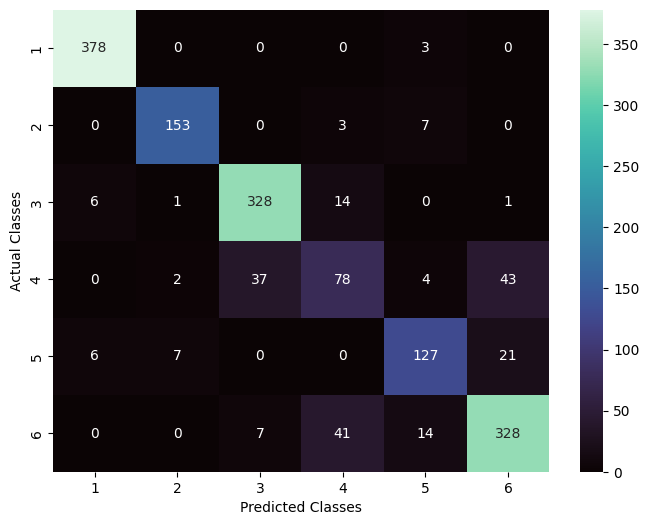

In [108]:
def plot_cm_heatmap(confusion_mat):
    plt.figure(figsize=(8, 6))
    classes = ['1', '2', '3', '4', '5', '6']
    cm_matrix = pd.DataFrame(data=confusion_mat, columns=classes, index=classes)
       
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')
    plt.xlabel('Predicted Classes')
    plt.ylabel('Actual Classes')
    plt.show()

plot_cm_heatmap(confusion_mat)

### Gaussian RBF kernel

This kernel is a favorite choice in SVM, especially for data that doesn't line up straight. It's great for sorting data when you don't know much about it beforehand.

**Formula:**

$$F(x, x_j) = \exp{(-\gamma ||x - xj||^2)}$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous part. 

In [110]:
# TODO: Write your code here
model = SVC(kernel='rbf', gamma=0.1)
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
accuracy, balanced_accuracy, confusion_mat = evaluate(y_test, y_pred)

Accuracy:  0.9042883778744562
Balanced Accuracy:  0.8766479736545149
Confusion Matrix:
 [[377   2   0   0   2   0]
 [  0 157   0   3   3   0]
 [  3   1 338   5   0   3]
 [  0   3  37  92   2  30]
 [  4   2   1   0 143  11]
 [  0   0   6  25  11 348]]


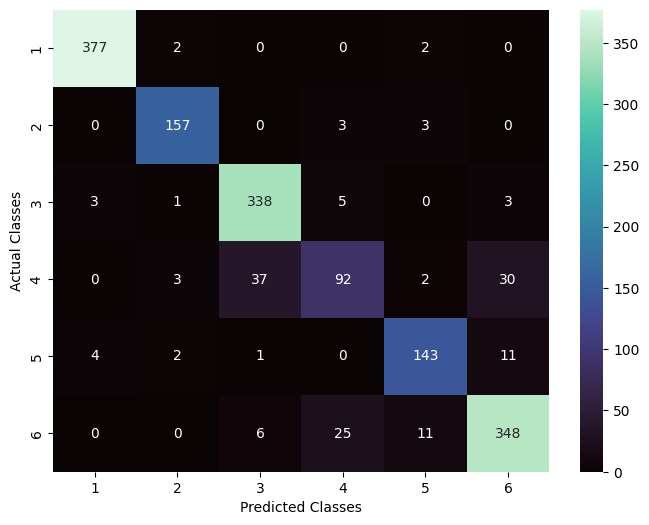

In [111]:
plot_cm_heatmap(confusion_mat)

### Polynomial Kernel

This is a broader version of the linear kernel. It's not as popular because it's not as quick or precise.

**Formula:**

$$F(x, x_j) = (x.x_j+1)^d$$

Now, set up the SVC classifier using a *polynomial* kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts.

In [123]:
# TODO: Write your code here
model = SVC(kernel='poly', degree=3, coef0=1)
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
accuracy, balanced_accuracy, confusion_mat = evaluate(y_test, y_pred)

Accuracy:  0.8999378495960224
Balanced Accuracy:  0.87452400714093
Confusion Matrix:
 [[380   0   0   0   1   0]
 [  0 158   0   2   3   0]
 [  4   1 334   7   1   3]
 [  0   3  33 101   2  25]
 [  6   3   1   1 135  15]
 [  0   0   5  33  12 340]]


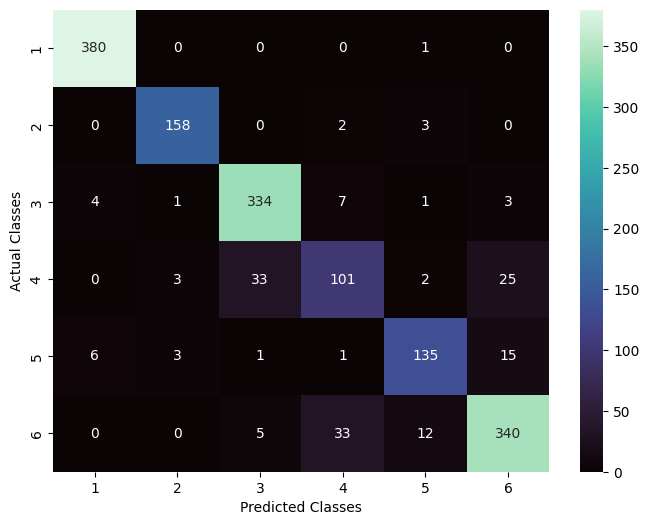

In [124]:
plot_cm_heatmap(confusion_mat)

### Sigmoid Kernel

This is mainly chosen for use with neural networks. The kernel function acts like the activation function in a two-layer perceptron neural network model, helping to activate the neurons.

**Formula:**

$$F(x, x_j) = \tanh(α x a y + c)$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts. 

In [121]:
# TODO: Write your code here
model = SVC(kernel='sigmoid', gamma='scale', coef0=0.1)
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
accuracy, balanced_accuracy, confusion_mat = evaluate(y_test, y_pred)

Accuracy:  0.711622125543816
Balanced Accuracy:  0.6559984396045956
Confusion Matrix:
 [[314   6  14   0  47   0]
 [ 25 133   0   1   4   0]
 [  2   1 322  22   0   3]
 [  2   2  47  35  19  59]
 [ 26  25   1  21  79   9]
 [  0   0  11  53  64 262]]


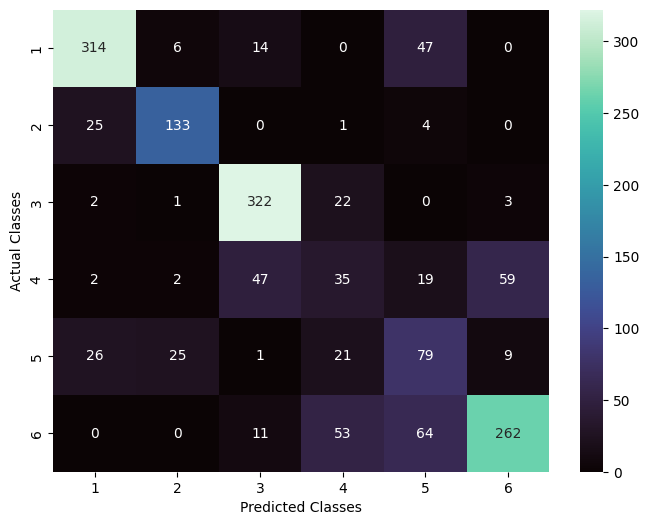

In [122]:
plot_cm_heatmap(confusion_mat)

Compare these four kernel functions with each other. What are the main advantages and disadvantages of each one? 

`TODO: Write Here`

**Linear Kernel**

Advantages:
1. Simple and fast, especially for high-dimensional data.
2. Works well when data is linearly separable.

Disadvantages:
1. Limited for capturing complex relationships, only separates using straight lines.

**Polynomial Kernel**

Advantages:
1. Captures more complex relationships than linear.
2. Flexible with nonlinear boundaries using higher degrees.

Disadvantages:
1. Computationally expensive, especially with high degrees.
2. Prone to overfitting with high polynomial degrees.


**Gaussian (RBF) Kernel**

Advantages:
1. Highly flexible, captures complex nonlinear relationships.
2. Automatically handles feature selection.
3. Maps data to high-dimensional space implicitly.

Disadvantages:
1. Computationally expensive, especially with large datasets or features.
2. Sensitive to gamma parameter, which may require tuning.
3. Risk of overfitting with large gamma values.


**Sigmoid Kernel**

Advantages:
1. Captures nonlinear relationships like Gaussian kernel.
2. Useful for non-linearly separable data.

Disadvantages:
1. Less common and less intuitive than other kernels.
2. Sensitive to parameters, which may need tuning for best performance.